# Metehan Ayhan - World Military Power Project

Bu proje, dünya ülkelerinin askeri kapasitelerini ve savunma güçlerini değerlendirmek amacıyla bir kümeleme (clustering) analizi yapmayı hedeflemektedir. Veriler, uçak gücü, denizaltı filosu, savunma bütçesi, insan gücü gibi çeşitli askeri ve ekonomik faktörleri içermektedir. Bu analiz sonucunda, benzer askeri kapasiteye sahip ülkeler gruplandırılacak ve ülkelerin askeri güçlerini daha iyi anlamak için bu kümeler değerlendirilecektir.

### Import Packet

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",100)

### Import Data

In [6]:
df=pd.read_excel('World military power.xlsx', header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,2020 ranking,NaN,Airforce Strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Land Strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Navy Strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finances,NaN,NaN,NaN,Logistics,NaN,Natural resources,NaN,NaN,NaN,NaN,NaN,Manpower,NaN,NaN,NaN,Geography,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
2,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
3,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
4,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       140 non-null    object
 1   1       139 non-null    object
 2   2       140 non-null    object
 3   3       139 non-null    object
 4   4       139 non-null    object
 5   5       139 non-null    object
 6   6       139 non-null    object
 7   7       139 non-null    object
 8   8       139 non-null    object
 9   9       139 non-null    object
 10  10      139 non-null    object
 11  11      139 non-null    object
 12  12      139 non-null    object
 13  13      139 non-null    object
 14  14      139 non-null    object
 15  15      139 non-null    object
 16  16      140 non-null    object
 17  17      139 non-null    object
 18  18      139 non-null    object
 19  19      139 non-null    object
 20  20      139 non-null    object
 21  21      139 non-null    object
 22  22      139 non-null    ob

### Data Preprocessing

Öncelikle ilk satırı silip 2. satırı başlık yapalım.

In [11]:
df = df.drop(index=0)
df.columns = df.iloc[0] 
df = df.drop(index=1) 

In [12]:
df.sample(5)

1,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
24,Canada,0.3712,Canada,385,Canada,62,Canada,0,Canada,38,Canada,135,Canada,145,Canada,0,Canada,80,Canada,1973,Canada,0,Canada,133,Canada,0,Canada,64,Canada,0,Canada,4,Canada,0,Canada,12,Canada,"22,50,00,00,000",Canada,"16,08,00,00,00,000",Canada,1467,Canada,"39,77,000",Canada,"25,00,000",Canada,"1,69,70,00,00,000",Canada,"1,61,10,865",Canada,"3,58,81,659",Canada,"99,84,670",Canada,"2,02,080",Canada,636,Canada,8893
17,Bosnia and Herzegovina,3.8586,Bosnia and Herzegovina,19,Bosnia and Herzegovina,0,Bosnia and Herzegovina,0,Bosnia and Herzegovina,0,Bosnia and Herzegovina,0,Bosnia and Herzegovina,19,Bosnia and Herzegovina,0,Bosnia and Herzegovina,320,Bosnia and Herzegovina,332,Bosnia and Herzegovina,24,Bosnia and Herzegovina,837,Bosnia and Herzegovina,143,Bosnia and Herzegovina,0,Bosnia and Herzegovina,0,Bosnia and Herzegovina,0,Bosnia and Herzegovina,0,Bosnia and Herzegovina,0,Bosnia and Herzegovina,"16,50,00,000",Bosnia and Herzegovina,"10,87,00,00,000",Bosnia and Herzegovina,24,Bosnia and Herzegovina,0,Bosnia and Herzegovina,32500,Bosnia and Herzegovina,0,Bosnia and Herzegovina,"23,94,632",Bosnia and Herzegovina,"38,49,891",Bosnia and Herzegovina,51197,Bosnia and Herzegovina,20,Bosnia and Herzegovina,0,Bosnia and Herzegovina,1543
104,Saudi Arabia,0.3034,Saudi Arabia,879,Saudi Arabia,270,Saudi Arabia,81,Saudi Arabia,49,Saudi Arabia,208,Saudi Arabia,283,Saudi Arabia,34,Saudi Arabia,1062,Saudi Arabia,12825,Saudi Arabia,705,Saudi Arabia,1818,Saudi Arabia,122,Saudi Arabia,55,Saudi Arabia,0,Saudi Arabia,0,Saudi Arabia,0,Saudi Arabia,3,Saudi Arabia,"67,60,00,00,000",Saudi Arabia,"2,05,10,00,00,000",Saudi Arabia,214,Saudi Arabia,"1,01,30,000",Saudi Arabia,"40,00,000",Saudi Arabia,"2,66,50,00,00,000",Saudi Arabia,"1,77,03,745",Saudi Arabia,"3,30,91,113",Saudi Arabia,"21,49,690",Saudi Arabia,2640,Saudi Arabia,0,Saudi Arabia,4272
5,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
88,Nigeria,0.6485,Nigeria,129,Nigeria,8,Nigeria,13,Nigeria,21,Nigeria,47,Nigeria,44,Nigeria,15,Nigeria,253,Nigeria,1789,Nigeria,25,Nigeria,339,Nigeria,36,Nigeria,75,Nigeria,0,Nigeria,0,Nigeria,0,Nige

İçerisinde value olmayan değerleri çıkaralım

In [14]:
columns = [col for col in df.columns if 'value' in col or col == 'Military Strength']
df = df[columns]

In [15]:
df.sample(5)

1,Military Strength,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
95,Paraguay,33,0,0,6,15,11,0,13,63,0,108,0,40,0,0,0,0,"25,00,00,000","17,70,00,00,000",799,0,30000,0,"33,72,366","70,25,763","4,06,752",NaN,3100,4655
122,Tajikistan,25,0,0,1,4,20,6,253,347,0,90,128,0,NaN,NaN,NaN,NaN,"1,60,00,00,000","5,75,00,00,000",24,180,20500,"1,20,00,000","40,95,924","86,04,882","1,43,100",NaN,200,4130
33,Democratic Republic of the Congo,53,2,4,13,0,34,8,175,100,16,120,57,20,0,0,0,0,"10,00,00,000","4,96,30,00,000",198,19160,10500,"18,00,00,000","3,41,12,410","8,52,81,024","23,44,858",37,15000,10481
121,Taiwan,744,289,0,19,207,210,91,1180,2000,482,1160,115,117,0,4,4,22,"10,72,50,00,000","1,81,90,00,00,000",37,196,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980,1566,3720,NaN
5,Angola,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369


In [16]:
df.isnull().sum()

1
Military Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value                        0
Oil Production value            

Şimdi eksik verileri 0 ile dolduralım. Çünkü o ülkelerin uçak gemisi, denizaltı olmayabilir. Kıyısı olmayan ülke de olabilir o yüzden 0 koyalım.

In [18]:
df['Navy Fleet Strengths value'].fillna(0, inplace=True)
df['Aircraft Carrier Fleet Strength value'].fillna(0, inplace=True)
df['Submarine Fleet Strength value'].fillna(0, inplace=True)
df['Destroyer Fleet Strength value'].fillna(0, inplace=True)
df['Frigate Fleet Strength value'].fillna(0, inplace=True)
df['Total Coastline Coverage value'].fillna(0, inplace=True)

In [19]:
df['Total Border Coverage value'].fillna(df['Total Border Coverage value'].median(), inplace=True)

In [20]:
df.head()

1,Military Strength,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
2,Afghanistan,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
3,Albania,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
4,Algeria,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
5,Angola,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
6,Argentina,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0


In [21]:
countries = df['Military Strength'] #ülke isimlerini saklayalım.

x = df.drop('Military Strength', axis=1)
x = x.applymap(lambda x: int(float(str(x).replace(',', ''))) if isinstance(x, str) else int(x))
x = x.astype(int, errors='ignore')

### Elbow Method

Verilerimizi kaç kümeye ayıracağımızı bulmak için uyguluyoruz.

In [24]:
m = x.copy()

In [25]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

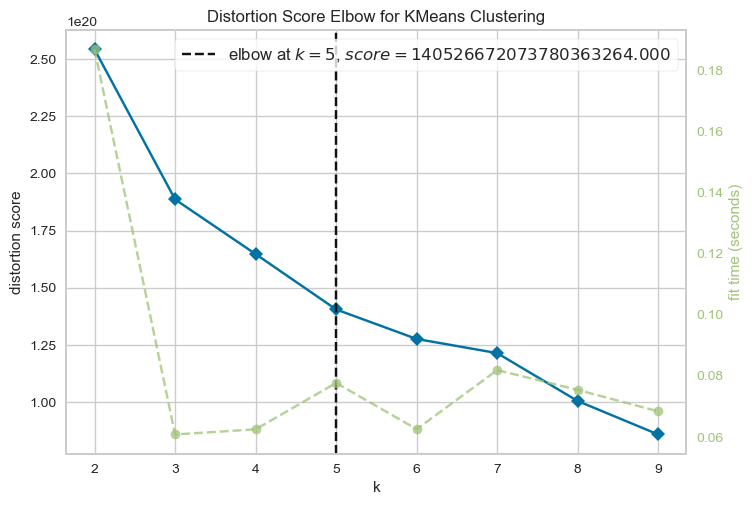

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
visualizer.fit(m) 
visualizer.show()  

### Clustering

In [28]:
model=KMeans(5)
model=model.fit(m)

In [29]:
tahmin=model.predict(m)

In [30]:
df = pd.DataFrame({
    'Country': countries,
    'Cluster': tahmin
})

In [31]:
df.head(10)

,Country,Cluster
2,Afghanistan,4
3,Albania,2
4,Algeria,1
5,Angola,0
6,Argentina,2
7,Armenia,1
8,Australia,3
9,Austria,0
10,Azerbaijan,0
11,Bahrain,1


### Result

In [33]:
silhouette_score(m,tahmin)

0.268108039339409

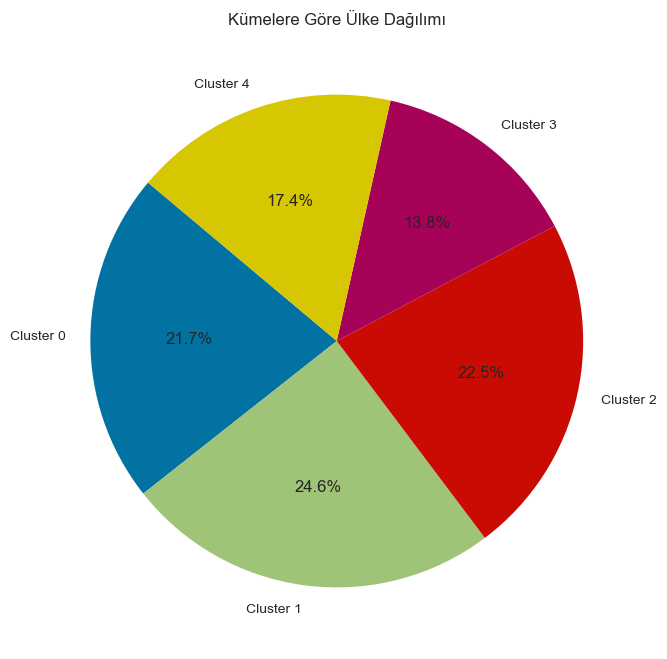

Cluster 0 içindeki ülkeler: Angola, Austria, Azerbaijan, Czechia, Ecuador, Egypt, France, Germany, Indonesia, Iran, Israel, Jordan, Kuwait, Lebanon, Libya, Mexico, Myanmar, Nigeria, Norway, Pakistan, Peru, Philippines, Saudi Arabia, Singapore, Spain, Sri Lanka, Sudan, Thailand, United Kingdom, United States
Cluster 1 içindeki ülkeler: Algeria, Armenia, Bahrain, Belarus, Belgium, Brazil, Canada, Chad, Croatia, Estonia, Guatemala, Hungary, Japan, Kenya, Laos, Latvia, Nepal, New Zealand, North Korea, Panama, Romania, Sierra Leone, Slovakia, South Africa, Suriname, Switzerland, Syria, Taiwan, Tajikistan, Turkey, Ukraine, United Arab Emirates, Venezuela, Vietnam
Cluster 2 içindeki ülkeler: Albania, Argentina, Cameroon, Central African Republic, China, Cuba, Democratic Republic of the Congo, Ethiopia, Finland, Georgia, Ghana, Greece, Honduras, Ireland, Ivory Coast, Kazakhstan, Kyrgyzstan, Liberia, Madagascar, Mali, Mauritania, Mongolia, Netherlands, North Macedonia, Paraguay, Poland, Somalia

In [34]:
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Kümelere Göre Ülke Dağılımı')
plt.show()

for cluster in cluster_counts.index:
    countries_in_cluster = df[df['Cluster'] == cluster]['Country'].tolist()
    print(f'Cluster {cluster} içindeki ülkeler: {", ".join(countries_in_cluster)}')

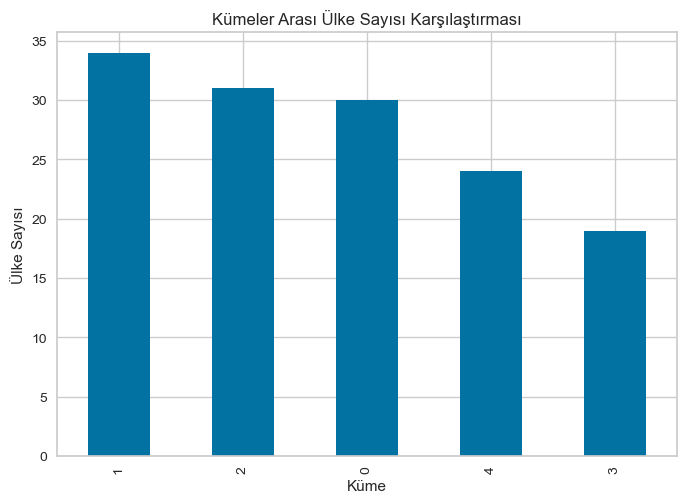

In [35]:
cluster_counts = df['Cluster'].value_counts()
cluster_counts.plot(kind='bar')
plt.xlabel('Küme')
plt.ylabel('Ülke Sayısı')
plt.title('Kümeler Arası Ülke Sayısı Karşılaştırması')
plt.show()

Bu kümeleme analizi, dünya ülkelerinin askeri kapasitelerini benzer özelliklerine göre gruplandırmak için kullanılmıştır. Sonuçlar, çeşitli askeri güç göstergelerine dayalı olarak ülkeleri belirli kümelere ayırarak, askeri güçlerin uluslararası dağılımını daha iyi anlamamızı sağlıyor.